In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [2]:
def get_features():
    features = ['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
               'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
               'SPEEDING', 'HITPARKEDCAR']
    return features

In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def get_column_na_alt(col):
    fill_na_alt = {
        'SEVERITYCODE': 0,
        'ADDRTYPE': '',
        'INTKEY': 0,
        'COLLISIONTYPE': '',
        'PERSONCOUNT': 0,
        'PEDCOUNT': 0,
        'PEDCYLCOUNT': 0,
        'VEHCOUNT': 0,
        'JUNCTIONTYPE': '',
        'INATTENTIONIND': 'N',
        'UNDERINFL': '',
        'WEATHER': '',
        'ROADCOND': '',
        'LIGHTCOND': '',
        'SPEEDING': 'N',
        'HITPARKEDCAR': ''
    }
    return fill_na_alt[col]

In [5]:
def get_processed_dataframe(df, columns):
    column_map = {}
    features = ['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
                'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                'SPEEDING', 'HITPARKEDCAR']
    target = 'SEVERITYCODE'
    categorical_columns = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
    one_hot_columns = ['ADDRTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR']
    for col in categorical_columns:
        df.fillna(get_column_na_alt(col), inplace=True)
        column_map[col] = {}
        unique_values = df[col].unique()
        for i, uv in enumerate(unique_values):
            column_map[col][uv] = i
    column_map['UNDERINFL'] = {'0': 'N',
                               '1': 'Y'}
    df.replace(column_map, inplace=True)
    for col in one_hot_columns:
        df_temp = pd.get_dummies(df[col])
        df_temp_col = df_temp.columns
        df_col_rename = {}
        for col_r in df_temp_col:
            df_col_rename[col_r] = col + '_' + col_r.upper()
        df_temp.rename(columns= df_col_rename, inplace=True)
        df = df.join(df_temp)
        if '' in df_col_rename.keys():
            df.drop([col, str(col+'_').strip()], axis=1, inplace=True)
        else:
            df.drop([col], axis=1, inplace=True)
    return df, column_map, features, target

In [6]:
df_collision, column_map, features, target = get_processed_dataframe(df_collision, features)
df_collision.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_ALLEY,ADDRTYPE_BLOCK,ADDRTYPE_INTERSECTION,INATTENTIONIND_Y,UNDERINFL_N,UNDERINFL_Y,SPEEDING_Y,HITPARKEDCAR_N,HITPARKEDCAR_Y
0,2,0,2,0,0,2,0,0,0,0,0,0,1,0,1,0,0,1,0
1,1,1,2,0,0,2,1,1,0,1,0,1,0,0,1,0,0,1,0
2,1,2,4,0,0,3,1,0,1,0,0,1,0,0,1,0,0,1,0
3,1,3,3,0,0,3,1,2,1,0,0,1,0,0,1,0,0,1,0
4,2,0,2,0,0,2,0,1,0,0,0,0,1,0,1,0,0,1,0


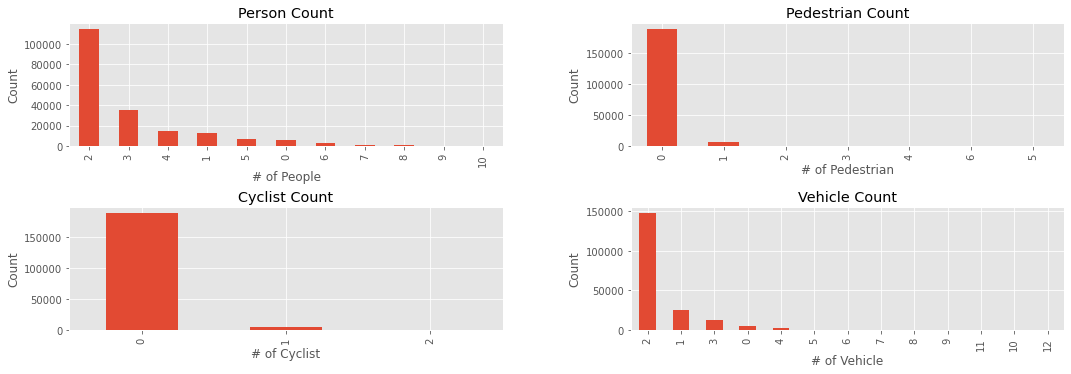

In [7]:
# df_analysis[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].plot(kind='bar')
fig, a = plt.subplots(2,2)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
fig.set_figheight(5)
fig.set_figwidth(16)
df_analysis.loc[df_analysis['PERSONCOUNT'] <= 10]['PERSONCOUNT'].value_counts().plot(kind='bar',ax=a[0,0])
a[0,0].set_title('Person Count')
a[0,0].set_xlabel('# of People')
a[0,0].set_ylabel('Count')
df_analysis['PEDCOUNT'].value_counts().plot(kind='bar',ax=a[0,1])
a[0,1].set_title('Pedestrian Count')
a[0,1].set_xlabel('# of Pedestrian')
a[0,1].set_ylabel('Count')
df_analysis['PEDCYLCOUNT'].value_counts().plot(kind='bar',ax=a[1,0])
a[1,0].set_title('Cyclist Count')
a[1,0].set_xlabel('# of Cyclist')
a[1,0].set_ylabel('Count')
df_analysis['VEHCOUNT'].value_counts().plot(kind='bar',ax=a[1,1])
a[1,1].set_title('Vehicle Count')
a[1,1].set_xlabel('# of Vehicle')
a[1,1].set_ylabel('Count')
plt.show()

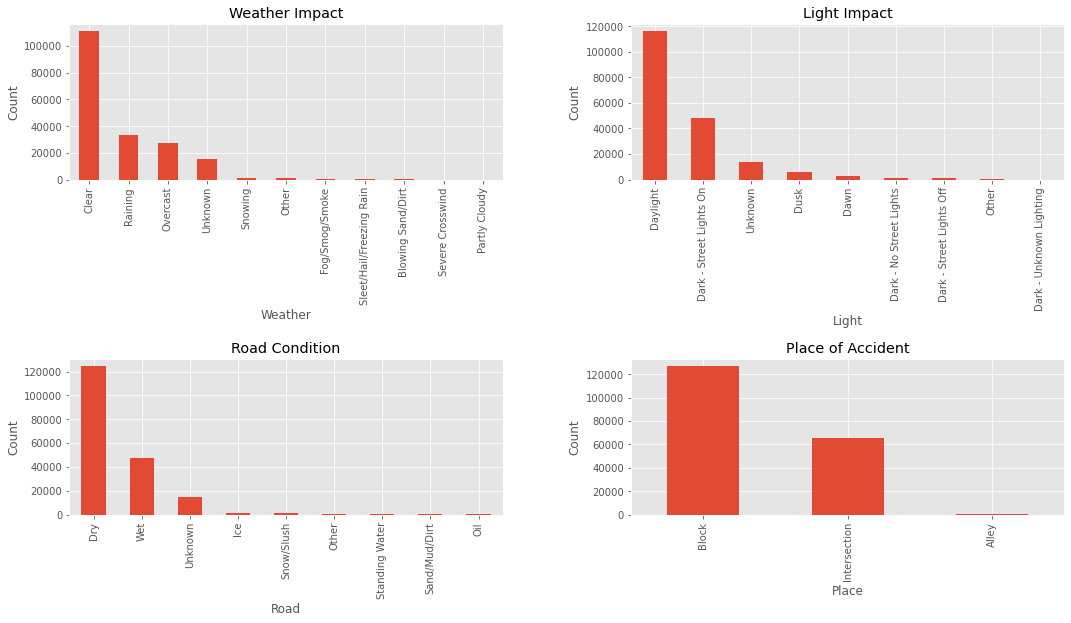

In [8]:
fig, a = plt.subplots(2,2)
fig.tight_layout()
plt.subplots_adjust(hspace=1.15)
fig.set_figheight(8)
fig.set_figwidth(16)
df_analysis['WEATHER'].value_counts().plot(kind='bar',ax=a[0,0])
a[0,0].set_title('Weather Impact')
a[0,0].set_xlabel('Weather')
a[0,0].set_ylabel('Count')
df_analysis['LIGHTCOND'].value_counts().plot(kind='bar',ax=a[0,1])
a[0,1].set_title('Light Impact')
a[0,1].set_xlabel('Light')
a[0,1].set_ylabel('Count')
df_analysis['ROADCOND'].value_counts().plot(kind='bar',ax=a[1,0])
a[1,0].set_title('Road Condition')
a[1,0].set_xlabel('Road')
a[1,0].set_ylabel('Count')
df_analysis['ADDRTYPE'].value_counts().plot(kind='bar',ax=a[1,1])
a[1,1].set_title('Place of Accident')
a[1,1].set_xlabel('Place')
a[1,1].set_ylabel('Count')
plt.show()

In [9]:
def get_column_correlation(df):
    correlation = df.corr()
    sbs.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
    return correlation

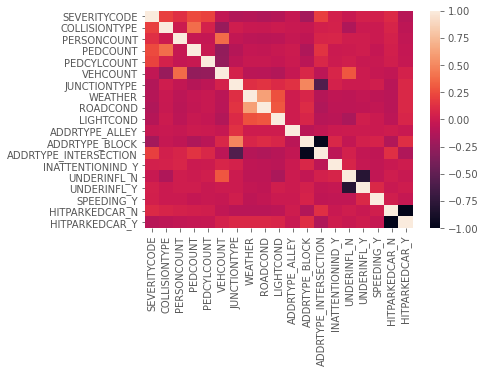

In [10]:
correlation = get_column_correlation(df_collision)

In [11]:
def apply_model(X_train, X_test, y_train, y_test, model):
    classifier = model
    classifier_model = classifier.fit(X_train, y_train)
    y_pred = classifier_model.predict(X_test)
    return get_accuracy_for_model(y_pred, y_test)


def get_accuracy_for_model(y_pred, y_test):
    return metrics.accuracy_score(y_test, y_pred)

In [12]:
def apply_model_and_get_accuracy(df):
    X = df.drop('SEVERITYCODE', axis=1)
    y = df.SEVERITYCODE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    model_list = [
        {
            'name': 'Decision Tree',
            'function': DecisionTreeClassifier(),
            'accuracy': 0
        },
        {
            'name': 'Gaussian Naive Bayes',
            'function': GaussianNB(),
            'accuracy': 0
        },
        {
            'name': 'Nearest Neighbors',
            'function': NearestCentroid(),
            'accuracy': 0
        },
        {
            'name': 'Neural Network',
            'function': MLPClassifier(
                solver='lbfgs',
                alpha=1e-5,
                hidden_layer_sizes=(5, 2),
                random_state=1
            ),
            'accuracy': 0
        }
    ]
    for model in model_list:
        model['accuracy'] = apply_model(X_train, X_test, y_train, y_test, model['function'])
        print('Accuracy for ' + model['name'] + ': ', model['accuracy'])
    return model_list

In [13]:
model_list = apply_model_and_get_accuracy(df_collision)


Accuracy for Decision Tree:  0.7470977021334886
Accuracy for Gaussian Naive Bayes:  0.7047532618745933
Accuracy for Nearest Neighbors:  0.6791205780623951
Accuracy for Neural Network:  0.7035889181877333


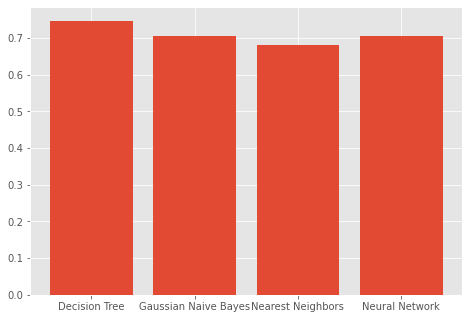

In [14]:
accuracy_list = []
models_name = []
for model_data in model_list:
    accuracy_list.append(model_data['accuracy'])
    models_name.append(model_data['name'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models_name,accuracy_list)
plt.show()